In [2]:
# Name: Christopher Okoye
# BAN6800: Data Analytics Capstone
# Title: Business Analytics Model: Forecasting Monthly Spending (Clothing, Shoes, Technology)


In [3]:
# import libraries needed for data cleaning and exploratory analysis

import numpy as np
import pandas as pd # load, clean, and manipulate data
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [4]:
# Load data set
df = pd.read_csv("customer_shopping_data.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.tail(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [6]:
# Step 3: Inspect the Dataset
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice_no,99457,99457,I232867,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,99457,99457,C273973,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,99457,2,Female,59482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,99457.0,NaN,NaN,NaN,43.427089,14.990054,18.0,30.0,43.0,56.0,69.0
category,99457,8,Clothing,34487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,99457.0,NaN,NaN,NaN,3.003429,1.413025,1.0,2.0,3.0,4.0,5.0
price,99457.0,NaN,NaN,NaN,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0
payment_method,99457,3,Cash,44447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice_date,99457,797,24/11/2021,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shopping_mall,99457,10,Mall of Istanbul,19943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for Missing Values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
# Remove Duplicates
df = df.drop_duplicates()
df.shape

(99457, 10)

In [9]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [10]:
# Standardize Column Names to make column names lowercase with underscores for consistency 
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [11]:
# Correct Data Types
# Convert date column to datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

In [12]:
# Convert categorical features to category type
categorical_cols = ["gender", "payment_method", "category", "shopping_mall"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  category      
 3   age             99457 non-null  int64         
 4   category        99457 non-null  category      
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  category      
 8   invoice_date    40029 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [13]:
# Handle Outliers
# Remove transactions with extreme prices or quantities (top 1%)
q_price = df["price"].quantile(0.99)
q_quantity = df["quantity"].quantile(0.99)

df = df[(df["price"] <= q_price) & (df["quantity"] <= q_quantity)]
df.shape

(99457, 10)

In [14]:
# Feature Engineering
# Add total amount spent per transaction
df["total_spent"] = df["quantity"] * df["price"]

In [15]:
# Add Year-Month for trend analysis
df["year_month"] = df["invoice_date"].dt.to_period("M")

In [16]:
# Create Age Groups
df["age_group"] = pd.cut(
    df["age"], 
    bins=[0, 17, 25, 40, 60, 100], 
    labels=["<18", "18-25", "26-40", "41-60", "60+"]
)

df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,year_month,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,26-40
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,18-25
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09,18-25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,NaT,Metropol AVM,15004.25,NaT,60+
4,I337046,C189076,Female,53,Books,4,60.60,Cash,NaT,Kanyon,242.40,NaT,41-60


In [17]:
df.isnull().sum()

invoice_no            0
customer_id           0
gender                0
age                   0
category              0
quantity              0
price                 0
payment_method        0
invoice_date      59428
shopping_mall         0
total_spent           0
year_month        59428
age_group             0
dtype: int64

In [18]:
# Drop rows with missing invoice_date
df = df.dropna(subset=['invoice_date'])

In [19]:
df.isnull().sum()
df.shape

(40029, 13)

In [20]:
# Save cleaned dataset to a new file
df.to_csv("customer_shopping_data_cleaned.csv", index=False)

print("Cleaned dataset saved as 'customer_shopping_data_cleaned.csv'")

Cleaned dataset saved as 'customer_shopping_data_cleaned.csv'


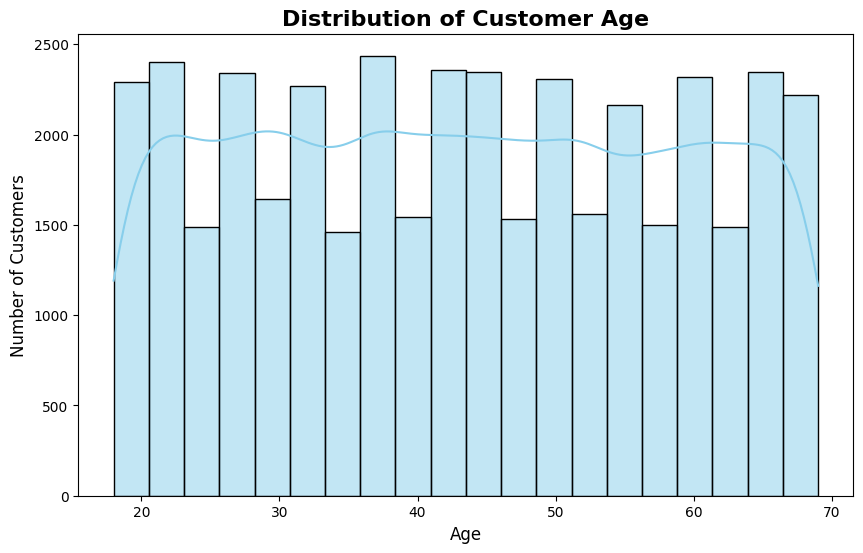

In [21]:
# Exploratory Data Analysis
# Histogram Distribution of Age

# Set style
plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue", edgecolor="black")

# Titles and labels
plt.title("Distribution of Customer Age", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Show plot
plt.show()


The customer age distribution histogram show a normal/Bell-shaped which indicate that Most customers are concentrated around the middle age group while fewer customers are at younger and older ends

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\2754007801.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby("age_group")["total_spent"].sum().reset_index()


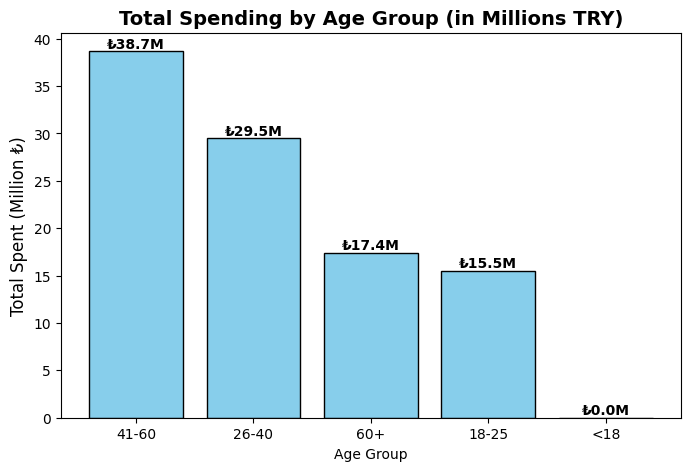

In [22]:
# Total Spending by Age Group
# Group by age_group and sum total spending
age_group_spending = df.groupby("age_group")["total_spent"].sum().reset_index()

# Convert to millions and round to 1 decimal
age_group_spending["total_spent_million"] = (age_group_spending["total_spent"] / 1_000_000).round(1)

# Sort by spending for better visualization
age_group_spending = age_group_spending.sort_values(by="total_spent_million", ascending=False)

# Step 4: Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(age_group_spending["age_group"], age_group_spending["total_spent_million"], 
               color="skyblue", edgecolor="black")

# Add value labels with TRY symbol
for bar, value in zip(bars, age_group_spending["total_spent_million"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"₺{value}M",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title("Total Spending by Age Group (in Millions TRY)", fontsize=14, fontweight="bold")
plt.xlabel("Age Group")
plt.ylabel("Total Spent (Million ₺)", fontsize=12)

plt.show()

The spending pattern highlights that middle-aged customers (26–60) form the core consumer base, making them the most valuable demographic segment for targeted marketing and sales strategies.

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\3090233512.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_spending = df.groupby("category")["total_spent"].sum().reset_index()


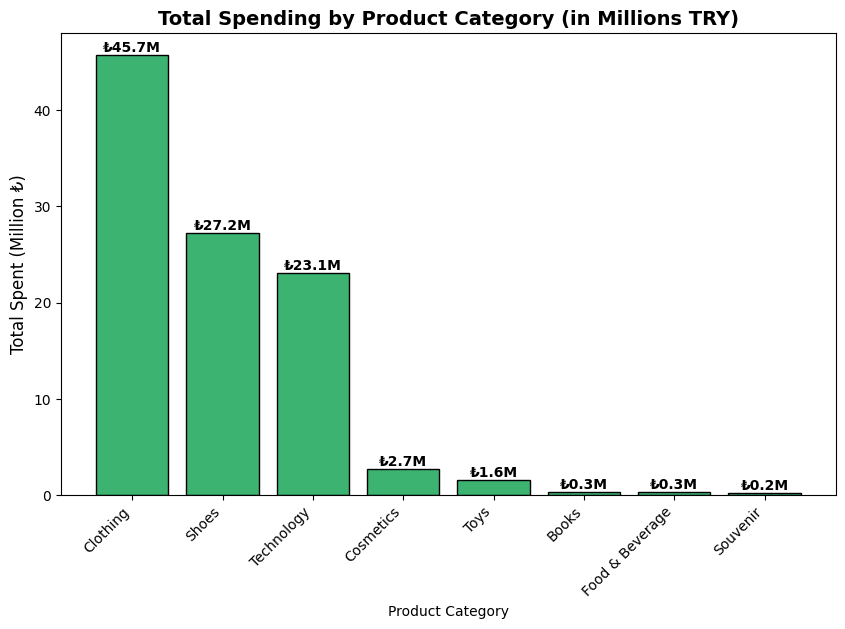

In [23]:
# Total spending by product category
# Group by category and sum total spending
category_spending = df.groupby("category")["total_spent"].sum().reset_index()

# Convert to millions and round to 1 decimal
category_spending["total_spent_million"] = (category_spending["total_spent"] / 1_000_000).round(1)

# Sort by spending for better visualization
category_spending = category_spending.sort_values(by="total_spent_million", ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_spending["category"], category_spending["total_spent_million"], 
               color="mediumseagreen", edgecolor="black")

# Add value labels with TRY symbol
for bar, value in zip(bars, category_spending["total_spent_million"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"₺{value}M",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title("Total Spending by Product Category (in Millions TRY)", fontsize=14, fontweight="bold")
plt.xlabel("Product Category")
plt.ylabel("Total Spent (Million ₺)", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.show()

This shows that fashion (clothing and shoes) and technology products drive the bulk of customer spending, whereas categories such as books, beverages, and souvenirs contribute very little.

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\1557827380.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_spending = df_filtered.groupby(["category", "Year"])["total_spent"].sum().reset_index()


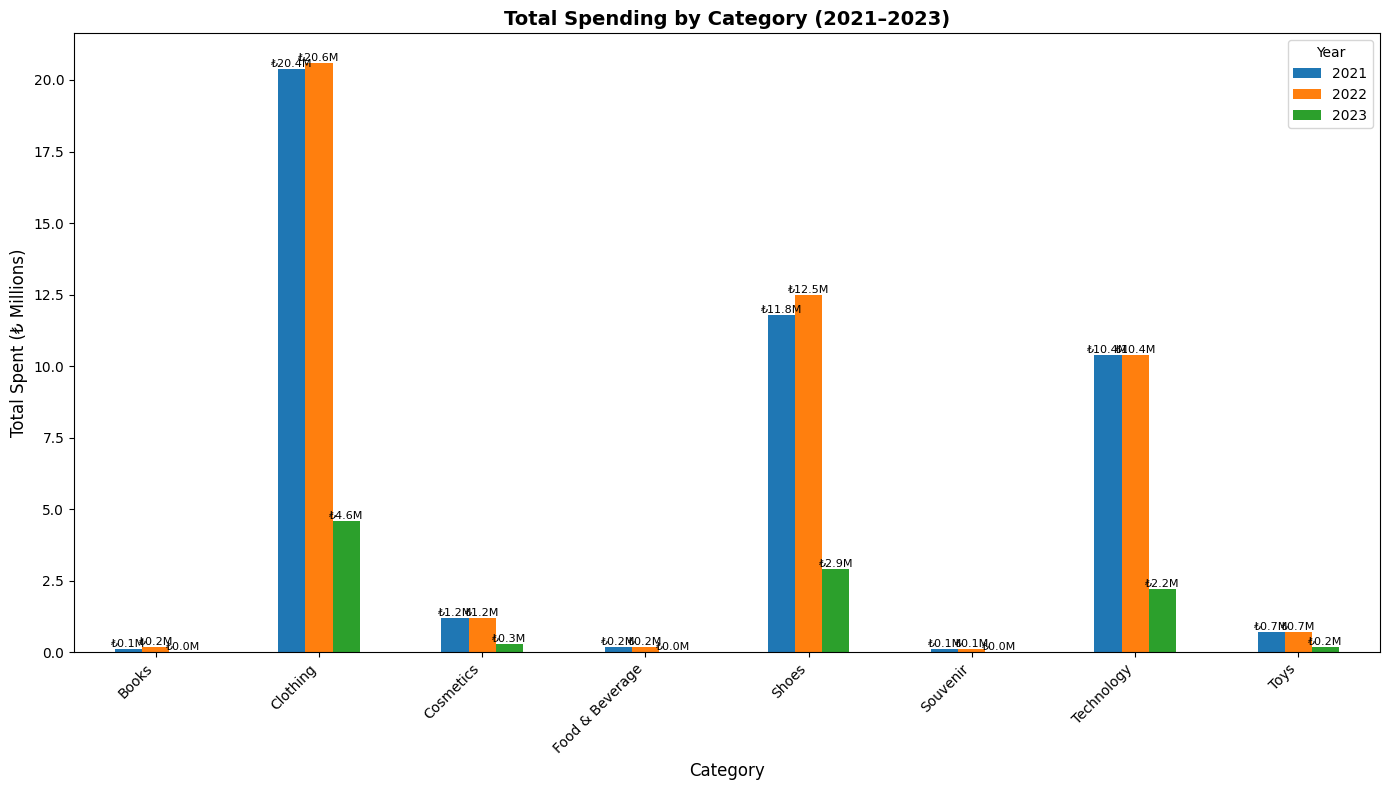

In [24]:
# Total spending by categoty (2021-2023)
# Extract year
df["Year"] = df["invoice_date"].dt.year
# Filter for 2021–2023 only
df_filtered = df[df["Year"].isin([2021, 2022, 2023])]

# Group by category and year
category_spending = df_filtered.groupby(["category", "Year"])["total_spent"].sum().reset_index()

# Convert to millions
category_spending["total_spent_million"] = (category_spending["total_spent"] / 1_000_000).round(1)

# Pivot for grouped bar chart
pivot_df = category_spending.pivot(index="category", columns="Year", values="total_spent_million").fillna(0)

# Plot grouped bar chart
ax = pivot_df.plot(kind="bar", figsize=(14, 8))

# Title and labels
plt.title("Total Spending by Category (2021–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Spent (₺ Millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="₺%.1fM", label_type="edge", fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\705736520.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_spending = filtered_df.groupby(["Year", "category", "shopping_mall"])["total_spent"].sum().reset_index()


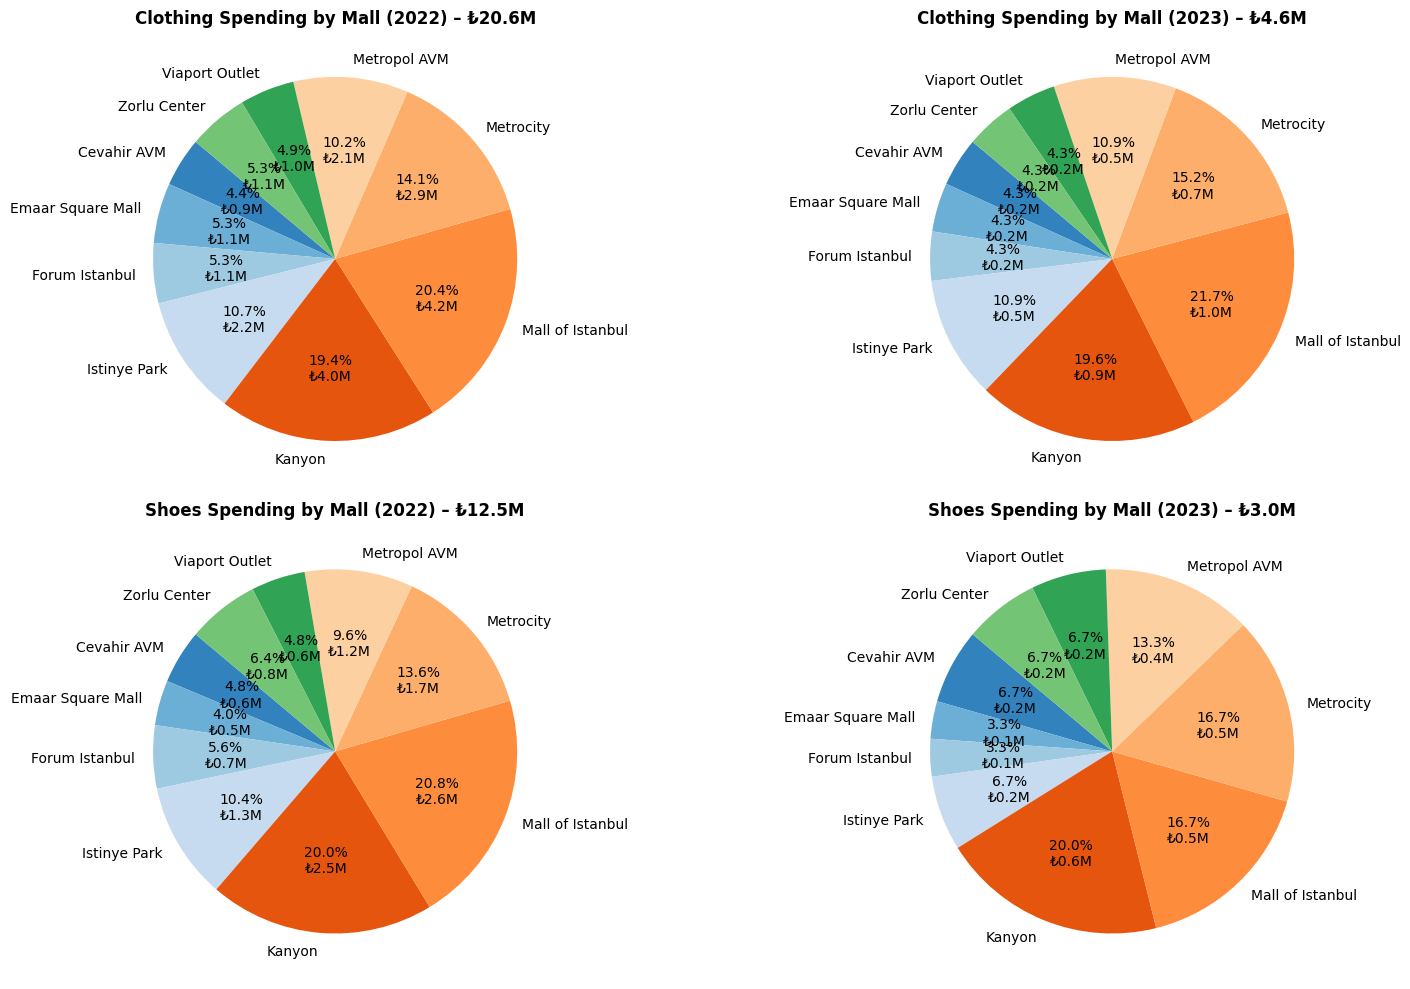

In [25]:
# Clothing spending by mall, 2022-2023
#  Step 3: Filter only Clothing and Shoes categories, and years 2022 & 2023
filtered_df = df[(df["category"].isin(["Clothing", "Shoes"])) & (df["Year"].isin([2022, 2023]))]

# Step 4: Group by Year, Category, Shopping Mall
mall_spending = filtered_df.groupby(["Year", "category", "shopping_mall"])["total_spent"].sum().reset_index()

# Step 5: Convert to millions (1 decimal place)
mall_spending["total_spent_million"] = (mall_spending["total_spent"] / 1_000_000).round(1)

# Step 6: Plot pie charts side by side for each category
categories = ["Clothing", "Shoes"]
years = [2022, 2023]

fig, axes = plt.subplots(len(categories), len(years), figsize=(16, 10))

# Custom label with percentage + value in million
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = (pct * total / 100.0)
        return f"{pct:.1f}%\n₺{val:.1f}M"
    return my_autopct

for i, cat in enumerate(categories):
    for j, year in enumerate(years):
        data = mall_spending[(mall_spending["Year"] == year) & (mall_spending["category"] == cat)]
        axes[i, j].pie(
            data["total_spent_million"],
            labels=data["shopping_mall"],
            autopct=make_autopct(data["total_spent_million"]),
            startangle=140,
            colors=plt.cm.tab20c.colors
        )
        total_value = data["total_spent_million"].sum()
        axes[i, j].set_title(
            f"{cat} Spending by Mall ({year}) – ₺{total_value:.1f}M", 
            fontsize=12, fontweight="bold"
        )

plt.tight_layout()
plt.show()

Mall of Istanbul had the highest clothing sales of 4.2M (20.4%) and 1M(21.7%) during the sales peak in 2022 and also during the sales decline in 2023 respectively

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\1660138494.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_spending = df.groupby("shopping_mall")["total_spent"].sum().reset_index()


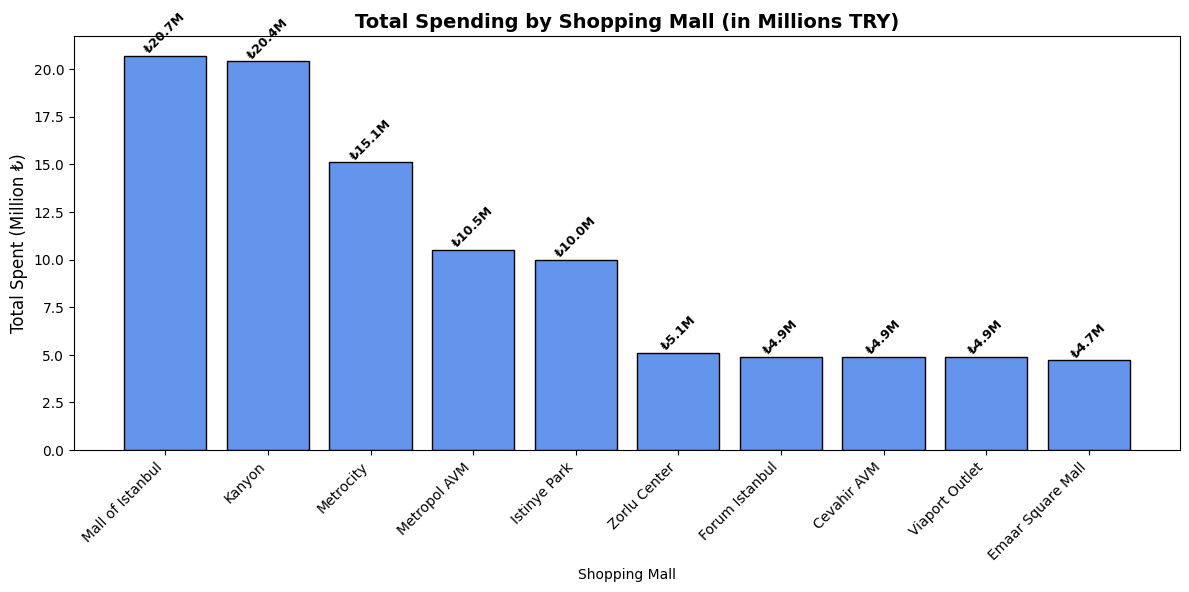

In [26]:
# Total spending by shopping mall
# Step 1: Group by shopping_mall and sum total spending
mall_spending = df.groupby("shopping_mall")["total_spent"].sum().reset_index()

# Step 2: Convert to millions and round to 1 decimal
mall_spending["total_spent_million"] = (mall_spending["total_spent"] / 1_000_000).round(1)

# Step 3: Sort by spending for better visualization
mall_spending = mall_spending.sort_values(by="total_spent_million", ascending=False)

# Step 4: Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(mall_spending["shopping_mall"], mall_spending["total_spent_million"], 
               color="cornflowerblue", edgecolor="black")

# Add value labels with TRY symbol
for bar, value in zip(bars, mall_spending["total_spent_million"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"₺{value}M",
             ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45)

# Titles and labels
plt.title("Total Spending by Shopping Mall (in Millions TRY)", fontsize=14, fontweight="bold")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Spent (Million ₺)", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

This pattern suggests that Istanbul and Kanyon malls are the primary retail hubs, driving the largest share of customer spending

C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\4193780012.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_spending = df_filtered.groupby(["shopping_mall", "Year"])["total_spent"].sum().reset_index()


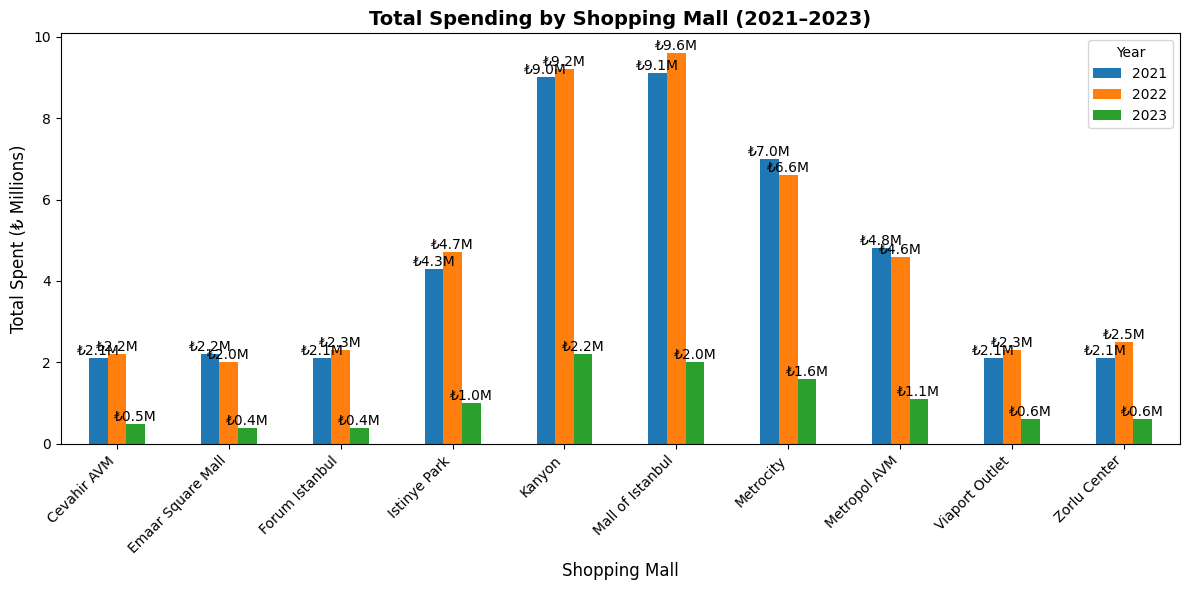

In [27]:
# Total spending by shopping mall 2021-2023
#  Filter only for 2021, 2022, 2023
df_filtered = df[df["Year"].isin([2021, 2022, 2023])]

# Group by shopping mall and year
mall_spending = df_filtered.groupby(["shopping_mall", "Year"])["total_spent"].sum().reset_index()

# Convert to millions
mall_spending["total_spent_million"] = (mall_spending["total_spent"] / 1_000_000).round(1)

# Pivot for grouped bar chart
pivot_df = mall_spending.pivot(index="shopping_mall", columns="Year", values="total_spent_million").fillna(0)

# Plot grouped bar chart
ax = pivot_df.plot(kind="bar", figsize=(12, 6))

# Title and labels
plt.title("Total Spending by Shopping Mall (2021–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Shopping Mall", fontsize=12)
plt.ylabel("Total Spent (₺ Millions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="₺%.1fM", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

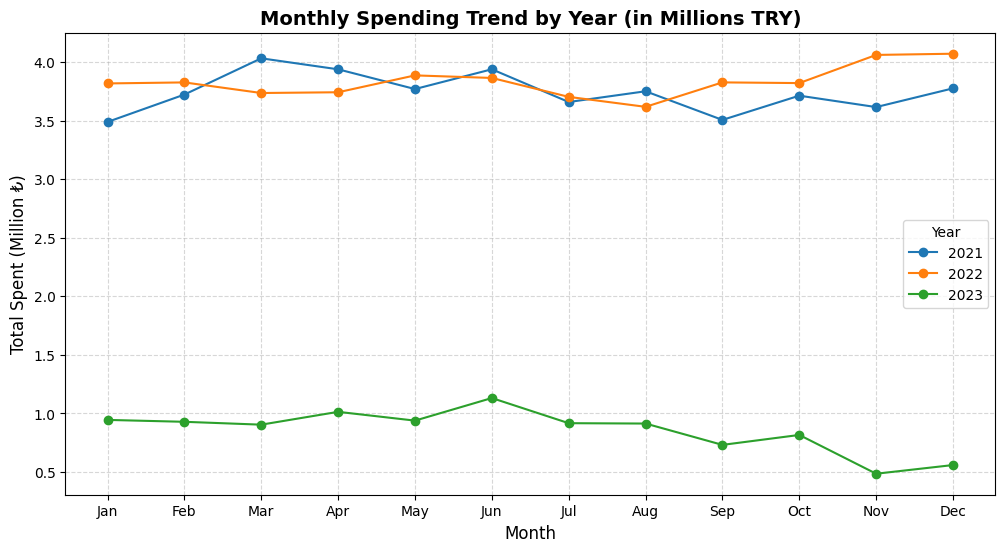

In [28]:
# Monthly spending trend by year
# Step 2: Extract Year and Month separately
df["Year"] = df["invoice_date"].dt.year
df["Month"] = df["invoice_date"].dt.month

# Step 3: Group by Year and Month, summing total_spent
monthly_trend = df.groupby(["Year", "Month"])["total_spent"].sum().reset_index()

# Step 4: Pivot for plotting (Year as columns, Months as rows)
pivot_trend = monthly_trend.pivot(index="Month", columns="Year", values="total_spent")

# Step 5: Convert to millions
pivot_trend = pivot_trend / 1_000_000

# Step 6: Plot
plt.figure(figsize=(12, 6))
pivot_trend.plot(kind="line", marker="o", figsize=(12,6))

# Titles and labels
plt.title("Monthly Spending Trend by Year (in Millions TRY)", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Spent (Million ₺)", fontsize=12)
plt.legend(title="Year")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

2021 and 2022 trend analysis maintained relatively stable monthly spending levels, ranging between 3.5M and 4.0M
This sharp reduction in 2023 compared to 2021 and 2022 indicates a major downturn in consumer expenditure which
suggests a potential shift in consumer behavior, economic slowdown, or external factors (e.g., inflation, reduced purchasing power, or market disruptions).


In [29]:
# Predictive model development 
# 1. Import libraries for linear regression model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
# 2. confirm and review loaded cleaned customer shopping data
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,year_month,age_group,Year,Month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,26-40,2022,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,18-25,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09,18-25,2021,9
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2700.72,2021-04,60+,2021,4
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,2022-03-06,Kanyon,1200.32,2022-03,60+,2022,3


In [31]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,year_month,age_group,Year,Month
99442,I105959,C131810,Female,45,Clothing,4,1200.32,Debit Card,2021-01-02,Istinye Park,4801.28,2021-01,41-60,2021,1
99445,I750456,C270290,Female,35,Food & Beverage,5,26.15,Cash,2021-07-05,Kanyon,130.75,2021-07,26-40,2021,7
99446,I327966,C107209,Female,32,Food & Beverage,1,5.23,Cash,2023-05-02,Metropol AVM,5.23,2023-05,26-40,2023,5
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,2023-01-01,Kanyon,300.08,2023-01,60+,2023,1
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,2021-09-10,Metropol AVM,896.00,2021-09,41-60,2021,9


In [32]:
# 3. Filter data set for top categories: Clothing, Shoes, Technology ---
top_categories = ["Clothing", "Shoes", "Technology"]
df_top = df[df["category"].isin(top_categories)]


In [33]:
# 4. Aggregate monthly spending per category 
df_grouped = (
    df_top.groupby(["year_month", "category"], as_index=False)["total_spent"].sum()
)


C:\Users\Pharmaconnect\AppData\Local\Temp\ipykernel_16556\3640821711.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top.groupby(["year_month", "category"], as_index=False)["total_spent"].sum()


In [34]:
# 5. Convert year_month into numeric month index (`month_index`) so the regression model can treat time as a continuous variable.
df_grouped["month_index"] = pd.factorize(df_grouped["year_month"])[0]

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,year_month,age_group,Year,Month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,26-40,2022,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,18-25,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09,18-25,2021,9
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2700.72,2021-04,60+,2021,4
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,2022-03-06,Kanyon,1200.32,2022-03,60+,2022,3


In [35]:
# 6.Define Features (X) and Target (y) ---
X = df_grouped[["month_index", "category"]]
y = df_grouped["total_spent"]

# 7. Preprocessoring
#  Encode Category using OneHotEncoder to transform the categorical feature (category) into numeric format suitable for the regression model.
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), ["category"])],
    remainder="passthrough",force_int_remainder_cols=False
)



In [36]:
# 8. Build pipeline with Linear Regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 9. split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10. Train the model with 80% split dataset
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['category'])])),
                ('regressor', LinearRegression())])

In [37]:
#  Evaluate the performance of the model using three key metrics
# Predictions
y_pred = pipeline.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Single Linear Regression Model (Clothing, Shoes, Technology)")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Single Linear Regression Model (Clothing, Shoes, Technology)
RMSE: 224187.94
MAE: 179694.20
R²: 0.86


RMSE (Root Mean Squared Error): 224,187.94
On average, the model’s predictions deviate from the actual monthly spending by about ₺224K. While this is a relatively large number in absolute terms, it should be interpreted against the scale of total spending (in millions).

MAE (Mean Absolute Error): 179,694.20
The average error across predictions is around ₺180K, which confirms that the model is fairly consistent, though not perfect, in estimating monthly total spending.

R² (Coefficient of Determination): 0.86
The model explains about 86% of the variance in monthly total spending across Clothing, Shoes, and Technology categories. This is a strong fit, indicating that the model captures most of the important patterns in the data.

In [38]:
# 13. Forecast Next Month
# Using the trained model, forecast total spending for the next unseen month for all three categories (Clothing, Shoes, Technology)
# Get next month index
next_month_index = df_grouped["month_index"].max() + 1

# Categories for forecasting
future_data = pd.DataFrame({
    "month_index": [next_month_index]*3,
    "category": ["Clothing", "Shoes", "Technology"]
})

forecast = pipeline.predict(future_data)

for cat, pred in zip(future_data["category"], forecast):
    print(f"Forecast for {cat} next month: {pred/1e6:.1f}M TRY")



Forecast for Clothing next month: 1.0M TRY
Forecast for Shoes next month: 0.5M TRY
Forecast for Technology next month: 0.4M TRY


This demonstrates how the model can be used for real-world business decision-making, such as inventory planning and sales forecasting.

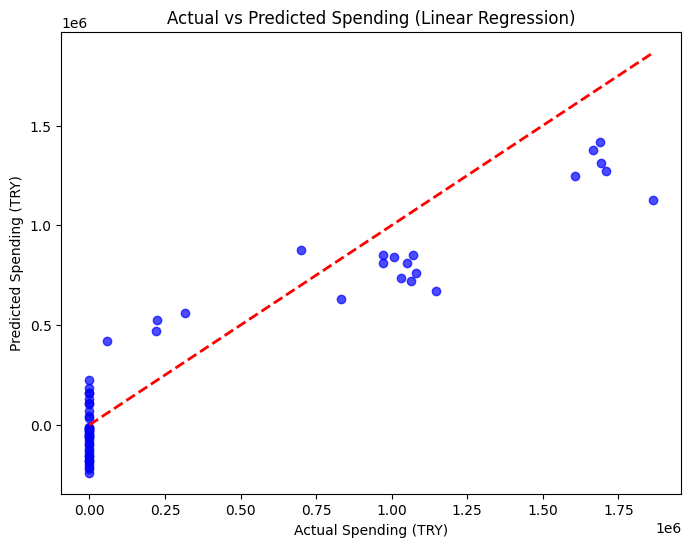

In [39]:
# 14. Visualization: Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Spending (TRY)")
plt.ylabel("Predicted Spending (TRY)")
plt.title("Actual vs Predicted Spending (Linear Regression)")
plt.show()

The scatter plot shows predicted values against actual values.  
The red dashed line represents a perfect prediction.  
The closer the points are to this line, the better the model performance.
Most of the points are close to the red line which is an indication of a good performance by the model.

In [40]:
# Save the trained pipeline using joblib which is preferred for scikit-learn models 
# because it handles large numpy arrays more efficiently.
import joblib

joblib.dump(pipeline, "monthly_spending_pipeline.pkl")
print("Pipeline saved as monthly_spending_pipeline.pkl")


Pipeline saved as monthly_spending_pipeline.pkl


Conclusion and Business Implications

The Linear Regression model developed in this notebook provides a baseline forecast for monthly customer spending across the top three product categories: Clothing, Shoes, and Technology. 

Model Performance
R² = 0.86**: The model explains 86% of the variance in monthly spending, which is a strong fit.  
RMSE ≈ ₺224K** and MAE ≈ ₺180K**. While prediction errors exist, they are reasonable compared to the multi-million total spending levels.  

Key advantage of a single linear regression model
1. A single unified model can successfully forecast spending across multiple categories by incorporating category as a feature.  
2. The model captures overall trends and seasonality, making it suitable for planning and forecasting. Forecast results can guide inventory planning, Sales forecast, and **marketing campaigns
3. The model is scalable making it possible to extended to more categories or different regions to support global operations.

Next Steps 
Deploy the model into a live environment so that forecasts update automatically as new sales data becomes available.  

